# ¿Cómo descompongo una matriz no cuadrada (SVD)?

Descomposición de una matriz en valores singulares
La descomposición por autovectores sólo es aplicable a matrices cuadradas. El presente método permite descomponer cualquier matriz en tres matrices:

- U → vectores izquierdos singulares
- D → matriz diagonal de valores singulares
- V → vectores derechos singulares
Estos valores se obtienen en python mediante el método:

U,D,V = np.linalg.svd(matriz)

**Nota:** Podemos ve a una matriz rectangular como una subtransformación del espacio, es decir podemos condensar información de tres a dos dimensiones.

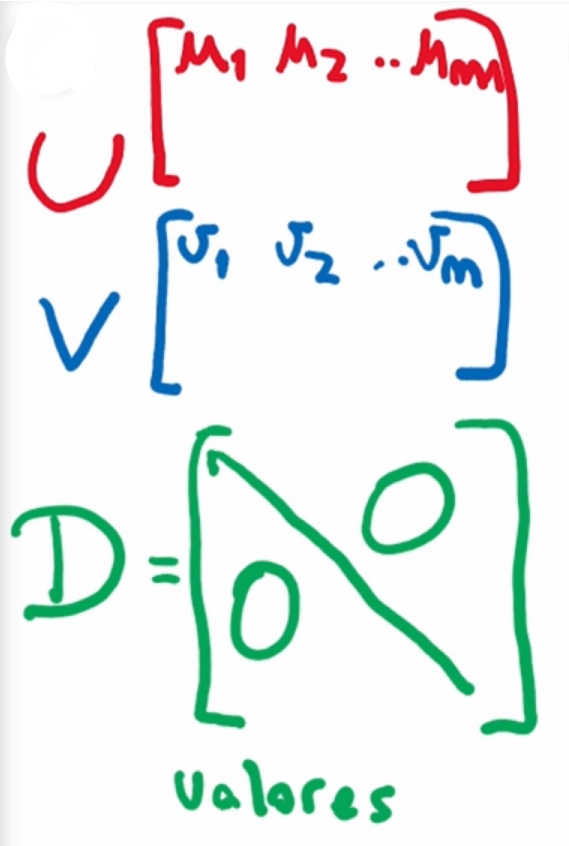

In [3]:
import numpy as np

A = np.array([[1,2,3], [3,4,5]])
print(A)

[[1 2 3]
 [3 4 5]]


**U** = termina siendo una matriz cuadrada

In [14]:
U, D, V = np.linalg.svd(A)
print(f'U = {U}')

U = [[-0.46410668  0.88577931]
 [-0.88577931 -0.46410668]]


**D** nos devuelve dos valores, pero si queremos ver la matriz solo tenemos que usar ```np.diag(D)```

In [19]:
print(f'D = {D}')
print(39*'-')
print(np.diag(D))

D = [7.97638869 0.61418515]
---------------------------------------
[[7.97638869 0.        ]
 [0.         0.61418515]]


En este caso es una matriz de 3x3

In [21]:
print(f'V = {V}')

V = [[-0.39133557 -0.5605708  -0.72980603]
 [-0.8247362  -0.13817999  0.54837623]
 [ 0.40824829 -0.81649658  0.40824829]]


## Reconstruir nuestra matriz
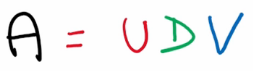

In [63]:
def SVD(A):
    U,D,V = np.linalg.svd(A)
    D = np.diag(D)
    
    if D.shape[1] != V.shape[0]:
        n_columns = np.abs(D.shape[0]-V.shape[0])
        extend = np.zeros(( D.shape[0] , n_columns ))
        D = np.append(D, extend, axis=1)
    
    return U,D,V

B = np.random.randint(1, 5, size=(3,4))
B

array([[2, 2, 1, 1],
       [3, 4, 3, 4],
       [4, 1, 3, 4]])

In [65]:
U = SVD(B)[0]
D = SVD(B)[1]
V = SVD(B)[2]

U.dot(D).dot(V)

array([[2., 2., 1., 1.],
       [3., 4., 3., 4.],
       [4., 1., 3., 4.]])